/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


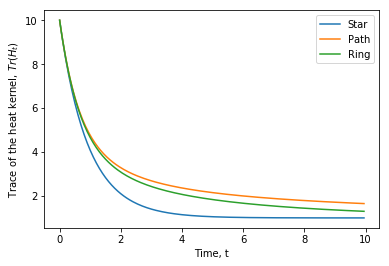

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())

time = np.arange(0,10,0.05)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.savefig('/home/alicenanyanzi/RecentProject/AliceThesis-Stellenbosch/images/Trace-kernel-plot.eps', format='eps', dpi=1000)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


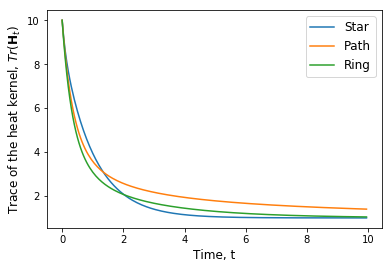

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.laplacian_matrix(G1).todense())
l2 = eigvals(nx.laplacian_matrix(G2).todense())
l3 = eigvals(nx.laplacian_matrix(G3).todense())

time = np.arange(0,10,0.05)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')


plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/trace-isospectral.eps', format='eps', dpi=1000)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


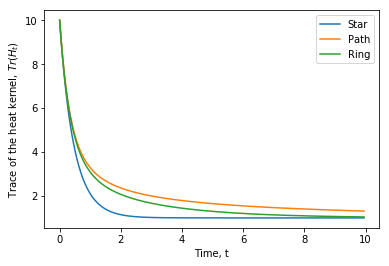

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())

time = np.arange(0,10,0.05)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum([e ** 2 for e in np.exp(-t*(l1))]))
    T2.append(np.sum([e ** 2 for e in np.exp(-t*(l2))]))
    T3.append(np.sum([e ** 2 for e in np.exp(-t*(l3))]))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

In [2]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def kplaplacian_mlf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*lam)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
def normalised_genlap(L):
    D = np.diagonal(L)
    D = [pow(d,-0.5) for d in D]
    D_hf = np.diag(D)
    Df = np.matmul(D_hf, L)
    Ln = np.matmul(Df,D_hf)
    return Ln

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


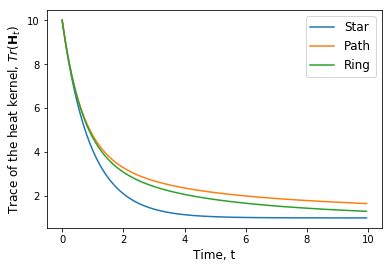

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(normalised_genlap(nx.laplacian_matrix(G1).todense()))
l2 = eigvals(normalised_genlap(nx.laplacian_matrix(G2).todense()))
l3 = eigvals(normalised_genlap(nx.laplacian_matrix(G3).todense()))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/trace-isospectral.eps', format='eps', dpi=1000)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


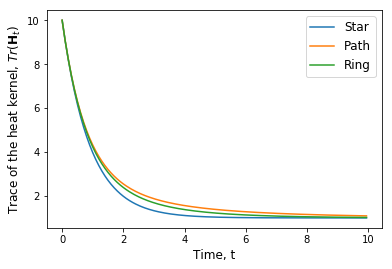

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
import itertools

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(normalised_genlap(kplaplacian_mlf(G1,2)))
l2 = eigvals(normalised_genlap(kplaplacian_mlf(G2,2)))
l3 = eigvals(normalised_genlap(kplaplacian_mlf(G3,2)))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/graphskernelmellin2.eps', format='eps', dpi=1000)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


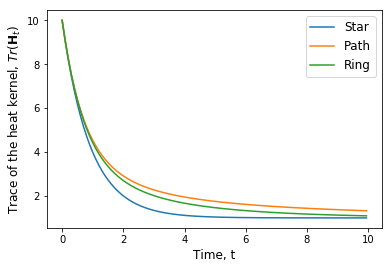

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(normalised_genlap(kplaplacian_mlf(G1,3)))
l2 = eigvals(normalised_genlap(kplaplacian_mlf(G2,3)))
l3 = eigvals(normalised_genlap(kplaplacian_mlf(G3,3)))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')

plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/graphskernelmellin3.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(kplaplacian_mlf(G1,2))
l2 = eigvals(kplaplacian_mlf(G2,2))
l3 = eigvals(kplaplacian_mlf(G3,2))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

In [9]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter
def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


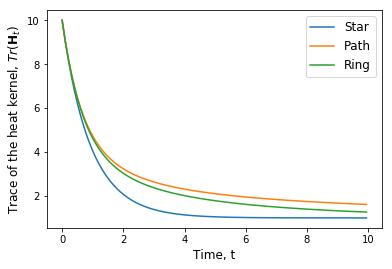

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(normalised_genlap(kplaplacian_ltf(G1,2)))
l2 = eigvals(normalised_genlap(kplaplacian_ltf(G2,2)))
l3 = eigvals(normalised_genlap(kplaplacian_ltf(G3,2)))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')

plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/graphskernellaplace2.eps', format='eps', dpi=1000)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


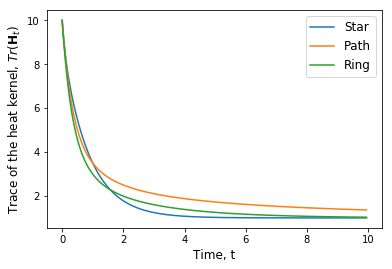

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(kplaplacian_ltf(G1,2))
l2 = eigvals(kplaplacian_ltf(G2,2))
l3 = eigvals(kplaplacian_ltf(G3,2))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')

plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/graphskernellaplace3.eps', format='eps', dpi=1000)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


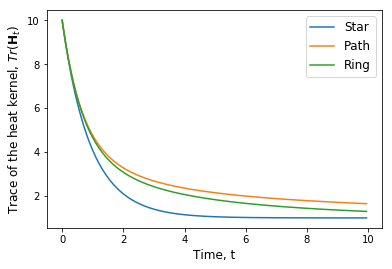

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(normalised_genlap(kplaplacian_ltf(G1,3)))
l2 = eigvals(normalised_genlap(kplaplacian_ltf(G2,3)))
l3 = eigvals(normalised_genlap(kplaplacian_ltf(G3,3)))

time = np.arange(0,10,0.05)

T1 =[]
T2 =[]
T3 = []
TT =[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t', fontsize=12)
plt.ylabel('Trace of the heat kernel, $Tr(\mathbf{H}_t)$', fontsize=12)
plt.legend(prop={'size': 12})
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/trace-isospectral.eps', format='eps', dpi=1000)
plt.show()